In [42]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [43]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data();

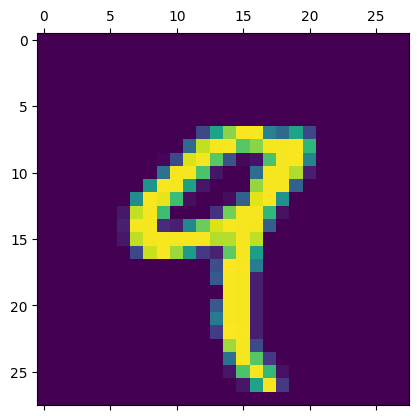

In [44]:
plt.matshow(X_train[4])

In [45]:
X_train = X_train / 255
X_test = X_test / 255

In [46]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [47]:
X_train_flattened.shape

(60000, 784)

In [48]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4694 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3038 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2830 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2730 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2665 - accuracy: 0.9256


In [49]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2675 - accuracy: 0.9263


[0.2674817144870758, 0.9262999892234802]

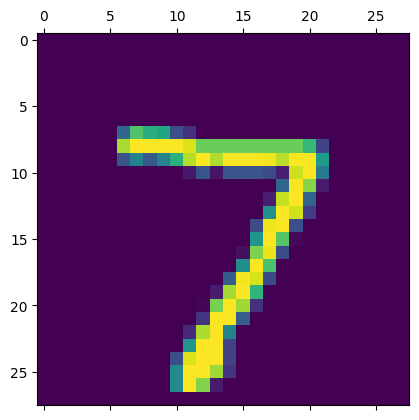

In [50]:
plt.matshow(X_test[0])

In [61]:
y_predicted=model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [62]:
y_predicted[0]

array([1.8256413e-02, 3.2476441e-07, 4.2342909e-02, 9.5060384e-01,
       4.1402746e-03, 9.1171734e-02, 2.6624512e-06, 9.9981081e-01,
       7.5531229e-02, 6.4521176e-01], dtype=float32)

In [63]:
np.argmax(y_predicted[0])

7

In [67]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [68]:

y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [69]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    2,    0,    6,    9,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   5,    8,  937,   15,   10,    3,   13,   11,   26,    4],
       [   2,    0,   22,  928,    0,   20,    3,   13,   14,    8],
       [   1,    1,    3,    1,  927,    0,   11,    4,    7,   27],
       [   9,    2,    2,   37,   12,  764,   22,    8,   28,    8],
       [   8,    3,    4,    1,    7,    9,  923,    2,    1,    0],
       [   1,    5,   21,    7,    9,    0,    0,  951,    2,   32],
       [   7,    9,    7,   27,   10,   25,   11,   14,  855,    9],
       [  11,    7,    1,   13,   38,    3,    0,   29,    3,  904]])>

Text(95.72222222222221, 0.5, 'Truth')

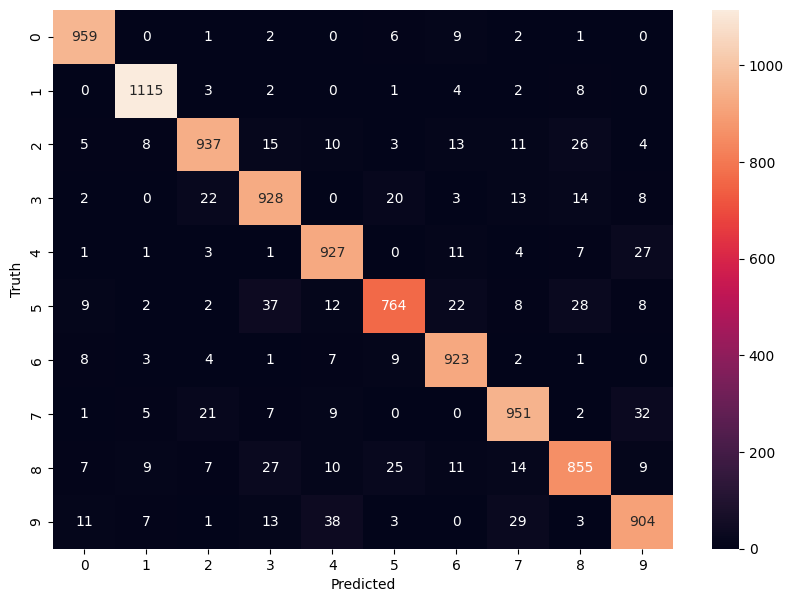

In [70]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [71]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2825 - accuracy: 0.9198
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1318 - accuracy: 0.9618
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0905 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0685 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0539 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0442 - accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0357 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0286 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0239 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [72]:

model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0834 - accuracy: 0.9765


[0.08337008953094482, 0.9764999747276306]